# 11) 위키피디아 시각화

In [3]:
#pip install transformers

# 위키피디아 설치
# ! pip install wikipedia

import wikipedia

# 키워드 설정
keyword = "Moderna"

# 위키피디아 언어 설정
wikipedia.set_lang("en")

# 키워드 검색 및 출력
search_response = wikipedia.search(keyword)
print(search_response)

['Moderna', 'Studio Moderna', 'Moderna COVID-19 vaccine', 'T-72', 'Devotio Moderna', 'Moderna University', 'Moderna Museet', 'Moderna Museet Malmö', 'Moderna tider', "Rocko's Modern Life"]


In [4]:
search_response[2]

'Moderna COVID-19 vaccine'

In [5]:
moderna_text_t = wikipedia.page(search_response[2])

type(moderna_text_t)

wikipedia.wikipedia.WikipediaPage

In [6]:
moderna_text_t

<WikipediaPage 'Moderna COVID-19 vaccine'>

In [7]:
moderna_text = wikipedia.page(search_response[2]).content

moderna_text

'The Moderna COVID‑19 vaccine (INN: elasomeran), sold under the brand name Spikevax, is a COVID-19 vaccine developed by American company Moderna, the United States National Institute of Allergy and Infectious Diseases (NIAID), and the Biomedical Advanced Research and Development Authority (BARDA). Depending on the jurisdiction, it is authorized for use in people aged six months, twelve years, or eighteen years and older. It provides protection against COVID-19 which is caused by infection by the SARS-CoV-2 virus. It is designed to be administered as two or three 0.5 mL doses given by intramuscular injection at an interval of at least 28 days apart.It is an mRNA vaccine composed of nucleoside-modified mRNA (modRNA) encoding a spike protein of SARS-CoV-2, which is encapsulated in lipid nanoparticles.It is authorized for use at some level in many countries.In August and September 2022, bivalent versions of the vaccine (Moderna COVID-19 Vaccine, Bivalent) containing elasomeran/elasomeran 0

In [8]:
keyword = "PFizer"

wikipedia.set_lang("en")

search_response = wikipedia.search(keyword)
print(search_response)

pfizer_text = wikipedia.page(search_response[1]).content

['Pfizer', 'Pfizer–BioNTech COVID-19 vaccine', 'Nirmatrelvir/ritonavir', 'Charles Pfizer', 'Albert Bourla', 'Sildenafil', 'Pfizer (disambiguation)', 'Abdullahi v. Pfizer, Inc.', 'Operation Warp Speed', 'Roivant Sciences']


In [9]:
from transformers import pipeline, AutoTokenizer

get_feature = pipeline('feature-extraction', model='bert-base-uncased', tokenizer='bert-base-uncased')

In [10]:
sample_word = "vaccine"
hidden_state = get_feature(sample_word)

import numpy as np

np.array(hidden_state).shape

(1, 3, 768)

In [11]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

print(tokenizer.decode(tokenizer(sample_word)['input_ids']))
#   [CLS]   [SEP]
#   시작    문장구분 

[CLS] vaccine [SEP]


In [12]:
def get_cls_vector(sample_text):
  hidden_state = get_feature(sample_text, padding=True, truncation=True, max_length=512)
  cls_vec = np.array(hidden_state)[0, 0]
  return cls_vec

ml = moderna_text.split("\n")
#                       개행문자
pfzl = pfizer_text.split("\n")

ml = [text for text in ml if text != '']
pfzl = [text for text in pfzl if text != '']

In [13]:
moderna_vecs = np.array([get_cls_vector(text) for text in ml])
pfizer_vecs = np.array([get_cls_vector(text) for text in pfzl])

print(moderna_vecs.shape)
print(pfizer_vecs.shape)

(69, 768)
(78, 768)


In [18]:
pfizer_dics = {}

for text in pfzl:
  for token in tokenizer.tokenize(text):
    if len(token) > 5:
      if token not in pfizer_dics:
#             없으면 사전
        pfizer_dics[token] = 1
      else:
        pfizer_dics[token] += 1

sorted(pfizer_dics.items(), key=lambda x:-x[1])[:30]

[('vaccine', 142),
 ('against', 36),
 ('united', 27),
 ('booster', 26),
 ('million', 26),
 ('people', 25),
 ('disease', 22),
 ('authorized', 20),
 ('states', 20),
 ('authorization', 20),
 ('##valent', 19),
 ('effectiveness', 19),
 ('second', 18),
 ('european', 18),
 ('##nation', 16),
 ('months', 16),
 ('health', 16),
 ('medicines', 14),
 ('agency', 14),
 ('development', 13),
 ('trials', 13),
 ('safety', 13),
 ('december', 13),
 ('vaccines', 13),
 ('clinical', 12),
 ('infection', 12),
 ('countries', 12),
 ('september', 12),
 ('control', 12),
 ('protection', 11)]

In [15]:
ml_dics = {}

for text in ml:
  for token in tokenizer.tokenize(text):
    if len(token) > 5:
      if token not in ml_dics:
        ml_dics[token] = 1
      else:
        ml_dics[token] += 1

sorted(ml_dics.items(), key=lambda x:-x[1])[:30]

[('vaccine', 97),
 ('modern', 75),
 ('people', 19),
 ('authorized', 17),
 ('authorization', 17),
 ('clinical', 17),
 ('health', 15),
 ('million', 15),
 ('##valent', 14),
 ('against', 13),
 ('booster', 13),
 ('united', 12),
 ('months', 12),
 ('september', 12),
 ('efficacy', 12),
 ('injection', 11),
 ('august', 11),
 ('emergency', 11),
 ('second', 10),
 ('trials', 10),
 ('national', 9),
 ('protection', 9),
 ('canada', 9),
 ('european', 9),
 ('safety', 9),
 ('disease', 9),
 ('december', 9),
 ('results', 9),
 ('vaccines', 9),
 ('announced', 9)]

c:\Python3.9.13\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python3.9.13\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


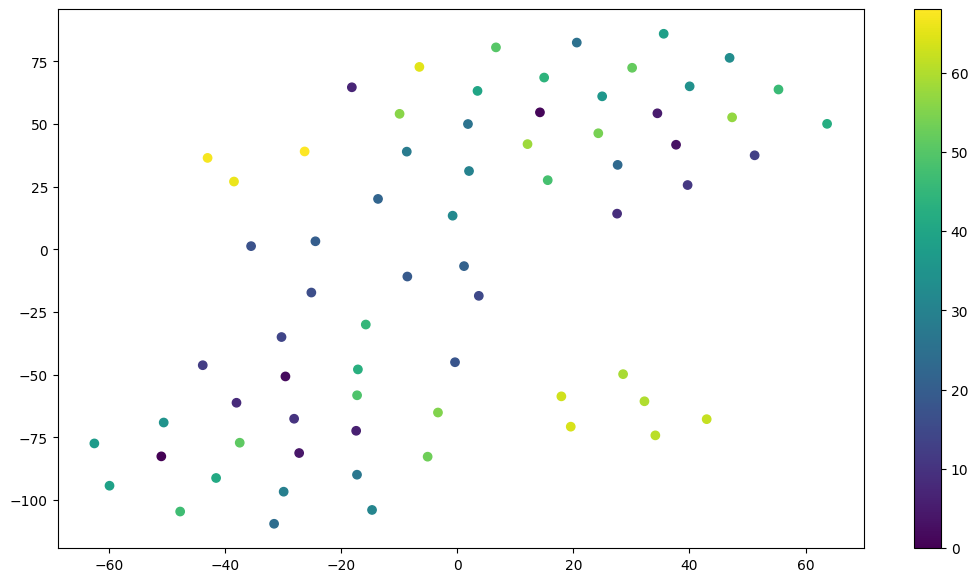

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
moderna_vecs_reduced = tsne.fit_transform(moderna_vecs)

import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))
plt.scatter(moderna_vecs_reduced[:, 0], moderna_vecs_reduced[:, 1],  c=[i for i in range(len(ml))])
plt.colorbar()
plt.show()